In [5]:
library(tidyverse)
library(bmetenrichr, lib.loc='/home/mklein/.conda/envs/ion_suppression/lib/R/library')
library(pbapply, lib.loc='/home/mklein/.conda/envs/ion_suppression/lib/R/library')

Warning message:
“package ‘pbapply’ was built under R version 4.2.2”


In [2]:
scm = read_csv('/home/mklein/FDA_project/data/Mx_Co_Cultured/lion_table.csv')
scm = column_to_rownames(scm, 'X1')
cond = str_replace(colnames(scm), "_.*", "")
annot = rownames(scm)

Warning message:
“Missing column names filled in: 'X1' [1]”
Warning message:
“Duplicated column names deduplicated: 'uncorrected' => 'uncorrected_1' [3], 'uncorrected' => 'uncorrected_2' [4], 'uncorrected' => 'uncorrected_3' [5], 'uncorrected' => 'uncorrected_4' [6], 'uncorrected' => 'uncorrected_5' [7], 'uncorrected' => 'uncorrected_6' [8], 'uncorrected' => 'uncorrected_7' [9], 'uncorrected' => 'uncorrected_8' [10], 'uncorrected' => 'uncorrected_9' [11], 'uncorrected' => 'uncorrected_10' [12], 'uncorrected' => 'uncorrected_11' [13], 'uncorrected' => 'uncorrected_12' [14], 'uncorrected' => 'uncorrected_13' [15], 'uncorrected' => 'uncorrected_14' [16], 'uncorrected' => 'uncorrected_15' [17], 'uncorrected' => 'uncorrected_16' [18], 'uncorrected' => 'uncorrected_17' [19], 'uncorrected' => 'uncorrected_18' [20], 'uncorrected' => 'uncorrected_19' [21], 'uncorrected' => 'uncorrected_20' [22], 'uncorrected' => 'uncorrected_21' [23], 'uncorrected' => 'uncorrected_22' [24], 'uncorrected' => 'un

In [3]:
scm

,uncorrected,uncorrected_1,uncorrected_2,uncorrected_3,uncorrected_4,uncorrected_5,uncorrected_6,uncorrected_7,uncorrected_8,uncorrected_9,⋯,ISM correction_1127,ISM correction_1128,ISM correction_1129,ISM correction_1130,ISM correction_1131,ISM correction_1132,ISM correction_1133,ISM correction_1134,ISM correction_1135,ISM correction_1136
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C16H30O2,265.80838,296.73480,472.5576,323.413420,472.5576,142.261020,242.3104,116.0415,135.04773,60.52071,⋯,552.72310,552.72310,491.73578,491.02158,552.72310,403.07750,356.51788,537.6353,520.5389,537.6353
C18H34O2,489.95820,567.77740,836.5371,653.158750,836.5371,757.007260,832.3491,0.0000,176.75543,623.16520,⋯,1603.15120,1603.15120,1186.84750,942.90630,1603.15120,1028.86500,1080.97900,2135.7856,1993.1793,2135.7856
C18H36O2,870.39610,1188.54050,2210.9346,1518.867000,2210.9346,1864.638900,1858.0277,711.5842,1888.14840,1868.12330,⋯,1365.77510,1365.77510,1142.10340,1082.69380,1365.77510,701.53560,1063.41220,1632.4603,1513.6025,1632.4603
C19H37O6P,1267.84280,1355.58600,2427.7292,1503.450800,2427.7292,2480.910000,2788.9856,635.2651,2517.28420,2416.20200,⋯,2698.88530,2698.88530,2464.45020,2598.02080,2698.88530,1887.39820,2342.51300,2615.2750,2528.4695,2615.2750
C19H39O7P,313.79956,373.47574,257.8283,446.733920,257.8283,509.651920,747.5887,111.0669,241.92204,407.44492,⋯,916.36900,916.36900,521.20100,540.95170,916.36900,369.40660,517.47130,542.6717,520.9230,542.6717
C20H32O2,560.95590,551.22000,0.0000,537.969670,0.0000,339.876800,461.6155,0.0000,0.00000,165.75848,⋯,1551.63610,1551.63610,923.51690,789.73254,1551.63610,822.52040,804.36810,2053.2397,1905.6130,2053.2397
C21H39O6P,607.01764,566.84790,0.0000,541.970640,0.0000,578.262270,852.5914,0.0000,748.03300,355.31976,⋯,1954.64170,1954.64170,1347.12120,1268.01700,1954.64170,982.64954,1086.60790,2234.0562,2081.2883,2234.0562
C21H41O6P,878.77295,1464.34180,3108.3145,2120.899200,3108.3145,2906.697800,3765.0505,827.0142,2198.45700,1968.66920,⋯,2595.77690,2595.77690,2140.06670,2221.59670,2595.77690,1463.73820,1805.77800,2418.6208,2299.4190,2418.6208
C21H41O7P,291.28760,240.56963,0.0000,208.978680,0.0000,629.588900,597.3608,137.5127,144.82014,588.04175,⋯,793.52790,793.52790,373.32663,301.45337,793.52790,549.84470,512.56824,1060.8722,1003.2903,1060.8722


In [6]:
myTestRun <-
  initEnrichment(scmatrix = scm,
                 annotations = annot,
                 conditions = cond,
                 condition.x = "uncorrected",
                 condition.y = "ISM correction")
myTestRun <- rankScore(myTestRun, ranking.by = 't.test')
myTestRun <- calcEnrichment(myTestRun, n = 100)


Parsing isomers...
single-cell metabolomics matrix of 58 metabolites and 2274 cells
active pathway: LION 

conditions: uncorrected, ISM correction 

condition.x: uncorrected 
condition.y: ISM correction 

Bootstrapping...

Match to pathway...


93.1% of annotations were matched to pathway




Perform enrichment analysis...


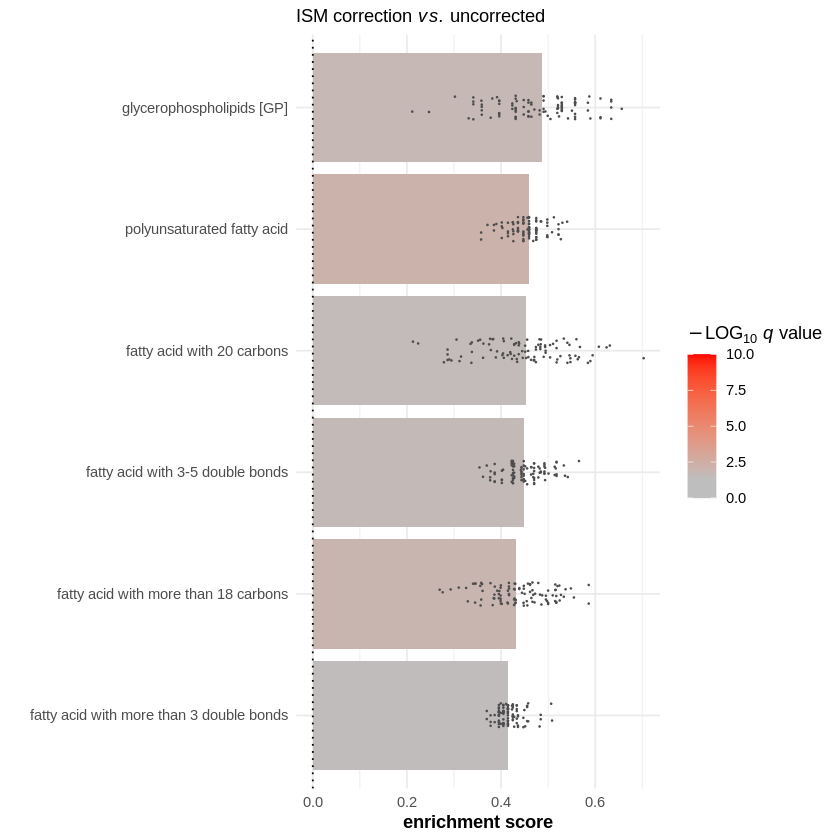

In [9]:
plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, by.statistic = "ES")